In [1]:
import numpy as np
import pandas as pd
from random import random
import math

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from GDR import GradientDR
from DensityDimReduction.distance_metric import get_nearest_neighbors
from DensityDimReduction.experiment_utils.get_data import get_dataset
import scipy
import networkit
import sklearn
from sklearn.cluster import OPTICS

C:\Users\User\Documents\Research\d-tSNE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
def set_seed(i):
    np.random.seed(i)

Based on code provided by: http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/

In [57]:
dims = [2,3,5,7,10,15,20,25,50,75,100,150,200,250]
#dims = [2,3]
seeds = [0,1,2,3,4]
#seeds = [0,1]

Make Data

In [2]:
import datagen

for dim in dims:
    for seed in seeds:
        print(str(dim) + " " + str(seed))
        datagen.run(["", seed, 1000, dim, 5, False, 0, 10, 25])

2 0
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
2 1
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
2 2
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
2 3
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
2 4
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
3 0
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
3 1
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
3 2
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
3 3
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
3 4
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
5 0
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
5 1
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
5 2
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
5 3
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
5 4
1
2
3
4
5
Data generated
Subspaces applied
Outliers generated
7 0
1
2
3


In [58]:
directory = os.path.join('data', 'blob')

for dim in dims:
    for seed in seeds:
        set_seed(seed)
        blobs = sklearn.datasets.make_blobs(1000, n_features=dim, centers = 10, center_box= (0,20))

        #print(blobs[0].shape)
        #print(blobs[1])



        blobdata = np.zeros((blobs[0].shape[0],blobs[0].shape[1]+1))
        blobdata[:,:-1] = blobs[0]
        blobdata[:,-1] = blobs[1]

        #print(blobdata)

        dataid = directory + "\\blob_data_1000_10_" + str(dim) + "_" + str(seed)
        np.save(dataid,blobdata)

In [59]:
directory = os.path.join('data', 'uniform')

for dim in dims:
    for seed in seeds:
        set_seed(seed)
        uniform = np.random.uniform(low=0, high=100, size=[1000,dim])

        #print(uniform)



        uniformdata = np.zeros((uniform.shape[0],uniform.shape[1]+1))
        uniformdata[:,:-1] = uniform

        #print(blobdata)

        dataid = directory + "\\uniform_data_1000_10_" + str(dim) + "_" + str(seed)
        np.save(dataid,uniformdata)

Set Datatsets

In [34]:
directory = os.path.join('data', 'synth')
datasets =  []
for dim in dims:
    for seed in seeds:
        datasets.append('synth_data_1000_5_' + str(dim) + '_' + str(seed))



points_list = []
labels_list = []
for i in range(len(datasets)):
    file_path = os.path.join(directory, str(datasets[i]) + ".npy")
    synthdata = np.load(file_path)
    points_list.append(synthdata[:,:-1])
    labels_list.append(synthdata[:,-1])

In [60]:
directory = os.path.join('data', 'blob')
datasets =  []
for dim in dims:
    for seed in seeds:
        datasets.append('blob_data_1000_10_' + str(dim) + '_' + str(seed))



points_list = []
labels_list = []
for i in range(len(datasets)):
    file_path = os.path.join(directory, str(datasets[i]) + ".npy")
    blobdata = np.load(file_path)
    points_list.append(blobdata[:,:-1])
    labels_list.append(blobdata[:,-1])

In [68]:
directory = os.path.join('data', 'uniform')
datasets =  []
for dim in dims:
    for seed in seeds:
        datasets.append('uniform_data_1000_10_' + str(dim) + '_' + str(seed))



points_list = []
labels_list = []
for i in range(len(datasets)):
    file_path = os.path.join(directory, str(datasets[i]) + ".npy")
    uniformdata = np.load(file_path)
    points_list.append(uniformdata[:,:-1])
    labels_list.append(uniformdata[:,-1])

Show 2-dim Data

(-3.0331964103928417, 22.86767979778874)

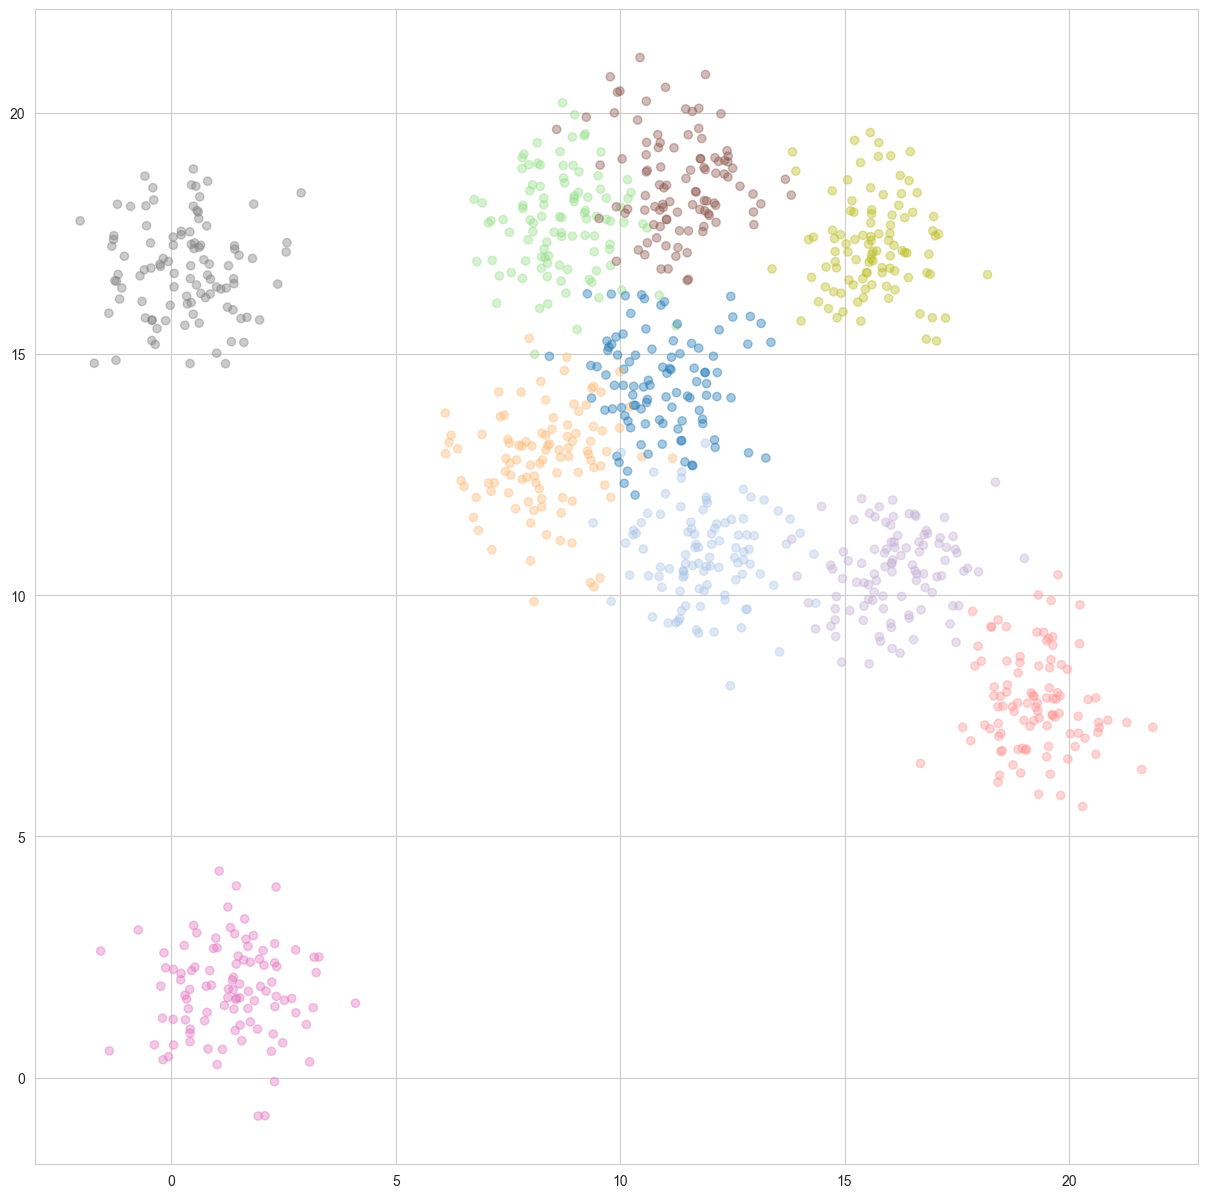

In [53]:
color = plt.cm.tab20(np.linspace(0, 1, 12))
#print(color[x3[:,2].astype('int32')])

plt.figure(figsize=(15,15))
plt.scatter(points_list[0][:,0], points_list[0][:,1], c=color[labels_list[0].astype('int32')], alpha=0.4)
#plt.scatter(centers[:,0], centers[:,1], c='black', alpha=1)

plt.ylim(np.min(points_list[0][:,1]-1), np.max(points_list[0][:,1]+1))
plt.xlim(np.min(points_list[0][:,0]-1), np.max(points_list[0][:,0]+1))

In [69]:
print(directory)
print(datasets)

data\uniform
['uniform_data_1000_10_2_0', 'uniform_data_1000_10_2_1', 'uniform_data_1000_10_2_2', 'uniform_data_1000_10_2_3', 'uniform_data_1000_10_2_4', 'uniform_data_1000_10_3_0', 'uniform_data_1000_10_3_1', 'uniform_data_1000_10_3_2', 'uniform_data_1000_10_3_3', 'uniform_data_1000_10_3_4', 'uniform_data_1000_10_5_0', 'uniform_data_1000_10_5_1', 'uniform_data_1000_10_5_2', 'uniform_data_1000_10_5_3', 'uniform_data_1000_10_5_4', 'uniform_data_1000_10_7_0', 'uniform_data_1000_10_7_1', 'uniform_data_1000_10_7_2', 'uniform_data_1000_10_7_3', 'uniform_data_1000_10_7_4', 'uniform_data_1000_10_10_0', 'uniform_data_1000_10_10_1', 'uniform_data_1000_10_10_2', 'uniform_data_1000_10_10_3', 'uniform_data_1000_10_10_4', 'uniform_data_1000_10_15_0', 'uniform_data_1000_10_15_1', 'uniform_data_1000_10_15_2', 'uniform_data_1000_10_15_3', 'uniform_data_1000_10_15_4', 'uniform_data_1000_10_20_0', 'uniform_data_1000_10_20_1', 'uniform_data_1000_10_20_2', 'uniform_data_1000_10_20_3', 'uniform_data_1000_1

In [70]:
eucliddists = []
manhatdists = []
cosinedists = []
widestdists = []

dsnedists = []
dsnedists2 = []
dsnedists5 = []
dsnedists10 = []

Calculate distances

In [71]:
eucliddist = 0
manhatdist = 0
cosinedist = 0
dsnedist = 0
dsne2dist = 0
dsne5dist = 0
dsne10dist = 0

print(directory)
print(datasets)

for i in range(len(datasets)):
    
    print(datasets[i])
    
    eucliddist = np.reshape(scipy.spatial.distance.cdist(points_list[i], points_list[i], metric='euclidean'), -1)
    eucfile = directory + "//" + str(datasets[i]) + "_euc"
    np.save(eucfile,eucliddist)
    

    
    manhatdist = np.reshape(scipy.spatial.distance.cdist(points_list[i], points_list[i], metric='cityblock'), -1) 
    manfile = directory + "//" + str(datasets[i]) + "_man"
    np.save(manfile,manhatdist)
    
    cosinedist = np.reshape(scipy.spatial.distance.cdist(points_list[i], points_list[i], metric='cosine'), -1)
    cosfile = directory + "//" + str(datasets[i]) + "_cos"
    np.save(cosfile,cosinedist)
    
    dsnenns = get_nearest_neighbors(points_list[i], 15, min_points=1)
    dsnedist = np.reshape(dsnenns['_all_dists'], -1)
    dsnefile = directory + "//" + str(datasets[i]) + "_dsne"
    np.save(dsnefile,dsnedist)
    
    dsnenns2 = get_nearest_neighbors(points_list[i], 15, min_points=2)
    dsne2dist = np.reshape(dsnenns2['_all_dists'], -1)
    dsne2file = directory + "//" + str(datasets[i]) + "_dsne2"
    np.save(dsne2file,dsne2dist)
    
    dsnenns5 = get_nearest_neighbors(points_list[i], 15, min_points=5)
    dsne5dist = np.reshape(dsnenns5['_all_dists'], -1)
    dsne5file = directory + "//" + str(datasets[i]) + "_dsne5"
    np.save(dsne5file,dsne5dist)
    
    dsnenns10 = get_nearest_neighbors(points_list[i], 15, min_points=10)
    dsne10dist = np.reshape(dsnenns10['_all_dists'], -1)
    dsne10file = directory + "//" + str(datasets[i]) + "_dsne10"
    np.save(dsne10file,dsne10dist)

data\uniform
['uniform_data_1000_10_2_0', 'uniform_data_1000_10_2_1', 'uniform_data_1000_10_2_2', 'uniform_data_1000_10_2_3', 'uniform_data_1000_10_2_4', 'uniform_data_1000_10_3_0', 'uniform_data_1000_10_3_1', 'uniform_data_1000_10_3_2', 'uniform_data_1000_10_3_3', 'uniform_data_1000_10_3_4', 'uniform_data_1000_10_5_0', 'uniform_data_1000_10_5_1', 'uniform_data_1000_10_5_2', 'uniform_data_1000_10_5_3', 'uniform_data_1000_10_5_4', 'uniform_data_1000_10_7_0', 'uniform_data_1000_10_7_1', 'uniform_data_1000_10_7_2', 'uniform_data_1000_10_7_3', 'uniform_data_1000_10_7_4', 'uniform_data_1000_10_10_0', 'uniform_data_1000_10_10_1', 'uniform_data_1000_10_10_2', 'uniform_data_1000_10_10_3', 'uniform_data_1000_10_10_4', 'uniform_data_1000_10_15_0', 'uniform_data_1000_10_15_1', 'uniform_data_1000_10_15_2', 'uniform_data_1000_10_15_3', 'uniform_data_1000_10_15_4', 'uniform_data_1000_10_20_0', 'uniform_data_1000_10_20_1', 'uniform_data_1000_10_20_2', 'uniform_data_1000_10_20_3', 'uniform_data_1000_1

  3%|▉                             | 32584/1000000 [00:00<00:08, 109210.14it/s]


uniform_data_1000_10_2_1


  3%|█                             | 33890/1000000 [00:00<00:08, 119115.42it/s]


uniform_data_1000_10_2_2


  4%|█▏                            | 38158/1000000 [00:00<00:07, 123805.34it/s]


uniform_data_1000_10_2_3


  4%|█▏                            | 39406/1000000 [00:00<00:07, 129247.86it/s]


uniform_data_1000_10_2_4


  3%|▉                             | 32642/1000000 [00:00<00:08, 116876.55it/s]


uniform_data_1000_10_3_0


  8%|██▍                           | 83138/1000000 [00:00<00:03, 229379.88it/s]


uniform_data_1000_10_3_1


  4%|█▎                            | 44284/1000000 [00:00<00:06, 137286.92it/s]


uniform_data_1000_10_3_2


  5%|█▎                            | 45122/1000000 [00:00<00:06, 140883.47it/s]


uniform_data_1000_10_3_3


  5%|█▌                            | 51422/1000000 [00:00<00:06, 152512.16it/s]


uniform_data_1000_10_3_4


  4%|█▎                            | 43756/1000000 [00:00<00:07, 134590.78it/s]


uniform_data_1000_10_5_0


 10%|██▉                           | 98830/1000000 [00:00<00:03, 265426.58it/s]


uniform_data_1000_10_5_1


  7%|██▏                           | 72764/1000000 [00:00<00:04, 208224.29it/s]


uniform_data_1000_10_5_2


  7%|██                            | 68580/1000000 [00:00<00:04, 200747.71it/s]


uniform_data_1000_10_5_3


  9%|██▋                           | 91238/1000000 [00:00<00:03, 250610.62it/s]


uniform_data_1000_10_5_4


 10%|██▉                          | 102366/1000000 [00:00<00:03, 275170.56it/s]


uniform_data_1000_10_7_0


  7%|██                            | 70310/1000000 [00:00<00:04, 206112.84it/s]


uniform_data_1000_10_7_1


 10%|██▉                          | 101758/1000000 [00:00<00:03, 274252.61it/s]


uniform_data_1000_10_7_2


  6%|█▊                            | 60990/1000000 [00:00<00:05, 180906.85it/s]


uniform_data_1000_10_7_3


  8%|██▎                           | 77834/1000000 [00:00<00:04, 217156.97it/s]


uniform_data_1000_10_7_4


 10%|██▉                          | 100506/1000000 [00:00<00:03, 269026.18it/s]


uniform_data_1000_10_10_0


  8%|██▎                           | 77544/1000000 [00:00<00:04, 219259.89it/s]


uniform_data_1000_10_10_1


  9%|██▋                           | 87728/1000000 [00:00<00:03, 237081.85it/s]


uniform_data_1000_10_10_2


  7%|██▏                           | 73260/1000000 [00:00<00:04, 206918.72it/s]


uniform_data_1000_10_10_3


 11%|███▎                         | 114934/1000000 [00:00<00:03, 279781.58it/s]


uniform_data_1000_10_10_4


  8%|██▌                           | 84702/1000000 [00:00<00:03, 235487.71it/s]


uniform_data_1000_10_15_0


 10%|██▉                           | 98638/1000000 [00:00<00:03, 262403.54it/s]


uniform_data_1000_10_15_1


  9%|██▊                           | 92262/1000000 [00:00<00:03, 249046.63it/s]


uniform_data_1000_10_15_2


 10%|██▉                           | 97426/1000000 [00:00<00:03, 263801.12it/s]


uniform_data_1000_10_15_3


  8%|██▍                           | 79930/1000000 [00:00<00:04, 223963.34it/s]


uniform_data_1000_10_15_4


 12%|███▎                         | 115328/1000000 [00:00<00:02, 300348.58it/s]


uniform_data_1000_10_20_0


 13%|███▉                         | 133946/1000000 [00:00<00:02, 327162.08it/s]


uniform_data_1000_10_20_1


 10%|██▉                          | 100130/1000000 [00:00<00:03, 249125.73it/s]


uniform_data_1000_10_20_2


 10%|██▉                           | 96508/1000000 [00:00<00:03, 244375.39it/s]


uniform_data_1000_10_20_3


  9%|██▊                           | 94074/1000000 [00:00<00:03, 251591.97it/s]


uniform_data_1000_10_20_4


 14%|████                         | 141426/1000000 [00:00<00:02, 342493.68it/s]


uniform_data_1000_10_25_0


 11%|███                          | 107070/1000000 [00:00<00:03, 282739.10it/s]


uniform_data_1000_10_25_1


 13%|███▋                         | 125842/1000000 [00:00<00:02, 311477.57it/s]


uniform_data_1000_10_25_2


 13%|███▊                         | 132272/1000000 [00:00<00:02, 323163.49it/s]


uniform_data_1000_10_25_3


 16%|████▌                        | 156142/1000000 [00:00<00:02, 298777.58it/s]


uniform_data_1000_10_25_4


 12%|███▍                         | 118912/1000000 [00:00<00:02, 303999.10it/s]


uniform_data_1000_10_50_0


 14%|████                         | 138898/1000000 [00:00<00:02, 333162.21it/s]


uniform_data_1000_10_50_1


 13%|███▊                         | 129352/1000000 [00:00<00:02, 307457.82it/s]


uniform_data_1000_10_50_2


 13%|███▊                         | 131580/1000000 [00:00<00:02, 324130.82it/s]


uniform_data_1000_10_50_3


 14%|████                         | 141538/1000000 [00:00<00:02, 332357.74it/s]


uniform_data_1000_10_50_4


 14%|███▉                         | 137556/1000000 [00:00<00:02, 329967.62it/s]


uniform_data_1000_10_75_0


 21%|██████                       | 210964/1000000 [00:00<00:01, 444385.76it/s]


uniform_data_1000_10_75_1


 11%|███▎                         | 114200/1000000 [00:00<00:02, 296620.26it/s]


uniform_data_1000_10_75_2


 10%|███                          | 104768/1000000 [00:00<00:03, 274969.04it/s]


uniform_data_1000_10_75_3


 13%|███▊                         | 132502/1000000 [00:00<00:02, 302426.45it/s]


uniform_data_1000_10_75_4


 20%|█████▉                       | 203762/1000000 [00:00<00:01, 432257.35it/s]


uniform_data_1000_10_100_0


 17%|████▊                        | 167950/1000000 [00:00<00:02, 378983.93it/s]


uniform_data_1000_10_100_1


 12%|███▎                         | 115716/1000000 [00:00<00:02, 299814.30it/s]


uniform_data_1000_10_100_2


 19%|█████▍                       | 189264/1000000 [00:00<00:01, 405606.10it/s]


uniform_data_1000_10_100_3


 12%|███▌                         | 122134/1000000 [00:00<00:02, 306125.73it/s]


uniform_data_1000_10_100_4


 21%|██████▏                      | 211600/1000000 [00:00<00:01, 426787.65it/s]


uniform_data_1000_10_150_0


 18%|█████▏                       | 177318/1000000 [00:00<00:02, 406840.50it/s]


uniform_data_1000_10_150_1


 14%|███▉                         | 136412/1000000 [00:00<00:02, 334390.82it/s]


uniform_data_1000_10_150_2


 13%|███▋                         | 126586/1000000 [00:00<00:02, 310834.88it/s]


uniform_data_1000_10_150_3


 15%|████▎                        | 147350/1000000 [00:00<00:02, 350514.31it/s]


uniform_data_1000_10_150_4


 16%|████▊                        | 164988/1000000 [00:00<00:02, 378524.94it/s]


uniform_data_1000_10_200_0


 18%|█████▏                       | 177658/1000000 [00:00<00:02, 398829.80it/s]


uniform_data_1000_10_200_1


 14%|████                         | 141358/1000000 [00:00<00:02, 340137.49it/s]


uniform_data_1000_10_200_2


 16%|████▌                        | 157954/1000000 [00:00<00:02, 366583.18it/s]


uniform_data_1000_10_200_3


 15%|████▎                        | 146630/1000000 [00:00<00:02, 350024.84it/s]


uniform_data_1000_10_200_4


 18%|█████▎                       | 184722/1000000 [00:00<00:02, 398284.59it/s]


uniform_data_1000_10_250_0


 15%|████▍                        | 153900/1000000 [00:00<00:02, 357173.98it/s]


uniform_data_1000_10_250_1


 22%|██████▍                      | 220836/1000000 [00:00<00:01, 434656.65it/s]


uniform_data_1000_10_250_2


 19%|█████▋                       | 194030/1000000 [00:00<00:01, 418033.01it/s]


uniform_data_1000_10_250_3


 14%|████                         | 141084/1000000 [00:00<00:02, 335511.79it/s]


uniform_data_1000_10_250_4


 20%|█████▊                       | 200428/1000000 [00:00<00:01, 405168.99it/s]


Load Data

In [72]:
eucliddists = []
manhatdists = []
cosinedists = []
widestdists = []

dsnedists = []
dsnedists2 = []
dsnedists5 = []
dsnedists10 = []


for i in range(len(datasets)):
    
    print(datasets[i])

    file_path_euc = os.path.join(directory, str(datasets[i]) + "_euc.npy")
    eucliddist = np.load(file_path_euc)
    
    file_path_man = os.path.join(directory, str(datasets[i]) + "_man.npy")
    manhatdist = np.load(file_path_man)
    
    file_path_cos = os.path.join(directory, str(datasets[i]) + "_cos.npy")
    cosinedist = np.load(file_path_cos)
    
    file_path_dsne = os.path.join(directory, str(datasets[i]) + "_dsne.npy")
    dsnedist = np.load(file_path_dsne)
    
    file_path_dsne2 = os.path.join(directory, str(datasets[i]) + "_dsne2.npy")
    dsne2dist = np.load(file_path_dsne2)
    
    file_path_dsne5 = os.path.join(directory, str(datasets[i]) + "_dsne5.npy")
    dsne5dist = np.load(file_path_dsne5)
    
    file_path_dsne10 = os.path.join(directory, str(datasets[i]) + "_dsne10.npy")
    dsne10dist = np.load(file_path_dsne10)
    
    eucliddists.append(eucliddist)
    manhatdists.append(manhatdist)
    cosinedists.append(cosinedist)
    dsnedists.append(dsnedist)
    dsnedists2.append(dsne2dist)
    dsnedists5.append(dsne5dist)
    dsnedists10.append(dsne10dist)

uniform_data_1000_10_2_0
uniform_data_1000_10_2_1
uniform_data_1000_10_2_2
uniform_data_1000_10_2_3
uniform_data_1000_10_2_4
uniform_data_1000_10_3_0
uniform_data_1000_10_3_1
uniform_data_1000_10_3_2
uniform_data_1000_10_3_3
uniform_data_1000_10_3_4
uniform_data_1000_10_5_0
uniform_data_1000_10_5_1
uniform_data_1000_10_5_2
uniform_data_1000_10_5_3
uniform_data_1000_10_5_4
uniform_data_1000_10_7_0
uniform_data_1000_10_7_1
uniform_data_1000_10_7_2
uniform_data_1000_10_7_3
uniform_data_1000_10_7_4
uniform_data_1000_10_10_0
uniform_data_1000_10_10_1
uniform_data_1000_10_10_2
uniform_data_1000_10_10_3
uniform_data_1000_10_10_4
uniform_data_1000_10_15_0
uniform_data_1000_10_15_1
uniform_data_1000_10_15_2
uniform_data_1000_10_15_3
uniform_data_1000_10_15_4
uniform_data_1000_10_20_0
uniform_data_1000_10_20_1
uniform_data_1000_10_20_2
uniform_data_1000_10_20_3
uniform_data_1000_10_20_4
uniform_data_1000_10_25_0
uniform_data_1000_10_25_1
uniform_data_1000_10_25_2
uniform_data_1000_10_25_3
unifor

In [73]:
def gather_values(dists, labels, bins = 30):
    #print(len(dists))
    #print(len(labels))

    label_agreement = np.expand_dims(labels, 0) == np.expand_dims(labels, 1)
    label_agreement = np.reshape(label_agreement, -1)
    is_noise = np.logical_or(np.expand_dims(labels, 0) == -1, np.expand_dims(labels, 1) == -1)
    is_noise = np.reshape(is_noise, -1)
    is_self = np.identity(len(labels))
    is_self = np.reshape(is_self, -1)
    intra_class = dists[np.logical_and(np.logical_and(label_agreement == 1,is_noise==0), is_self == 0)]
    intra_noise_class = dists[np.logical_and(np.logical_and(label_agreement == 1,is_noise==1), is_self == 0)]
    inter_class = dists[np.logical_and(np.logical_and(label_agreement == 0,is_noise==0), is_self == 0)]
    inter_noise_class = dists[np.logical_and(np.logical_and(label_agreement == 0,is_noise==1), is_self == 0)]
    
    notself =  dists[is_self == 0]
    
    mean = np.mean(notself)
    stdev = np.std(notself)
    
    max_value = max(dists)
    min_value = min(notself)
        
    print("min value: " + str(min_value))
    print("max value: " + str(max_value))
    
    
    
    ratio = min_value/max_value
    #print(len(intra_class))
    #print(len(inter_class))
    #print(len(intra_noise_class))
    #print(len(inter_noise_class))
    
    intra_hist = np.histogram(intra_class, bins= bins, range = (0,max_value))
    inter_hist = np.histogram(inter_class, bins= bins, range = (0,max_value))
    intra_noise_hist = np.histogram(intra_noise_class, bins= bins, range = (0,max_value))
    inter_noise_hist = np.histogram(inter_noise_class, bins= bins, range = (0,max_value))

    return intra_hist, inter_hist, intra_noise_hist, inter_noise_hist, ratio, mean, stdev

In [74]:
def make_graph(points_list, labels_list, num_bin, eucliddist, manhatdist, cosinedist, dsnedist, dsnedist2, dsnedist5, dsnedist10, dimlist, seedlist, datasets): #, dsnedist2):

    title = ""
    if('blob' in datasets[0]):
        title = "Blobs"
    elif('synth' in datasets[0]):
        title = "Density-based" 
    elif('uniform' in datasets[0]):
        title = "Uniform"
    
    colors = plt.cm.tab20(np.linspace(0, 1, 20))
    
    colors = ["deepskyblue", "lightskyblue","deepskyblue", "lightskyblue","deepskyblue", "lightskyblue","deepskyblue", "lightskyblue", "orange", "moccasin" , "green", "lightgreen", "purple", "mediumorchid"]

    ratios_man = []
    ratios_euc = []
    ratios_cos = []
    ratios_dsne = []
    ratios_dsne2 = []
    ratios_dsne5 = []
    ratios_dsne10 = []
    
    means_man = []
    means_euc = []
    means_cos = []
    means_dsne = []
    means_dsne2 = []
    means_dsne5 = []
    means_dsne10 = []
    
    stdevs_man = []
    stdevs_euc = []
    stdevs_cos = []
    stdevs_dsne = []
    stdevs_dsne2 = []
    stdevs_dsne5 = []
    stdevs_dsne10 = []
    
    print(seedlist)
    

    for i in range(len(dimlist)):
        
        
        intra_hists_dsne  = []
        inter_hists_dsne = []
        intra_hists_dsne2 = []
        inter_hists_dsne2 = [] 
        intra_hists_dsne5 = []
        inter_hists_dsne5 = []
        intra_hists_dsne10 = []
        inter_hists_dsne10 = []
        
        intra_hists_euc = []
        inter_hists_euc = []
        intra_hists_man = []
        inter_hists_man = []
        intra_hists_cos = []
        inter_hists_cos = []
        
        k = i * len(seedlist)
        for s in range(len(seedlist)):
            print("Dimensionality: " + str(dimlist[i]) + " Seed: " + str(seedlist[s]) + " Position: " + str(k+s))
            
            #print("DSNE")
            intra_hist_dsne, inter_hist_dsne, _, _, ratio_dsne, mean_dsne, stdev_dsne = gather_values(dsnedist[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_dsne) + "\n")
            #print("DSNE minPoints 2")
            intra_hist_dsne2, inter_hist_dsne2, _, _, ratio_dsne2, mean_dsne2, stdev_dsne2 = gather_values(dsnedist2[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_dsne2) + "\n")
            #print("DSNE minPoints 5")
            intra_hist_dsne5, inter_hist_dsne5, _, _, ratio_dsne5, mean_dsne5, stdev_dsne5 = gather_values(dsnedist5[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_dsne5) + "\n")
            #print("DSNE minPoints 10")
            intra_hist_dsne10, inter_hist_dsne10, _, _, ratio_dsne10, mean_dsne10, stdev_dsne10 = gather_values(dsnedist10[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_dsne10) + "\n")
            #print("Euclidean")
            intra_hist_euc, inter_hist_euc, _, _, ratio_euc, mean_euc, stdev_euc = gather_values(eucliddist[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_euc) + "\n")
            #print("Manhattan")
            intra_hist_man, inter_hist_man, _, _, ratio_man, mean_man, stdev_man = gather_values(manhatdist[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_man) + "\n")
            #print("Cosine")
            intra_hist_cos, inter_hist_cos, _, _, ratio_cos, mean_cos, stdev_cos = gather_values(cosinedist[k+s], labels_list[k+s], num_bin)
            #print("Ratio: " + str(ratio_cos))
            
            
            #print("Intra sum: " + str(np.sum(intra_hist_dsne[0])))
            #print("Inter sum: " + str(np.sum(inter_hist_dsne[0])))
            #print("Full sum: " + str(np.sum(intra_hist_dsne[0]) + np.sum(inter_hist_dsne[0]) ))
            
            
            #print("---")
            
            
            intra_hists_dsne.append(intra_hist_dsne[0])
            
            
            inter_hists_dsne.append(inter_hist_dsne[0])
            intra_hists_dsne2.append(intra_hist_dsne2[0])
            inter_hists_dsne2.append(inter_hist_dsne2[0])
            intra_hists_dsne5.append(intra_hist_dsne5[0])
            inter_hists_dsne5.append(inter_hist_dsne5[0])
            intra_hists_dsne10.append(intra_hist_dsne10[0])
            inter_hists_dsne10.append(inter_hist_dsne10[0])

            intra_hists_euc.append(intra_hist_euc[0])
            inter_hists_euc.append(inter_hist_euc[0])
            intra_hists_man.append(intra_hist_man[0])
            inter_hists_man.append(inter_hist_man[0])
            intra_hists_cos.append(intra_hist_cos[0])
            inter_hists_cos.append(inter_hist_cos[0])
            
            ratios_euc.append(ratio_euc)
            ratios_man.append(ratio_man)
            ratios_cos.append(ratio_cos)
            ratios_dsne.append(ratio_dsne)
            ratios_dsne2.append(ratio_dsne2)
            ratios_dsne5.append(ratio_dsne5)
            ratios_dsne10.append(ratio_dsne10)

            means_euc.append(mean_euc)
            means_man.append(mean_man)
            means_cos.append(mean_cos)
            means_dsne.append(mean_dsne)
            means_dsne2.append(mean_dsne2)
            means_dsne5.append(mean_dsne5)
            means_dsne10.append(mean_dsne10)

            stdevs_euc.append(stdev_euc)
            stdevs_man.append(stdev_man)
            stdevs_cos.append(stdev_cos)
            stdevs_dsne.append(stdev_dsne)
            stdevs_dsne2.append(stdev_dsne2)
            stdevs_dsne5.append(stdev_dsne5)
            stdevs_dsne10.append(stdev_dsne10)

        bin_man = intra_hist_man[1]
        bin_euc = intra_hist_euc[1]
        bin_cos = intra_hist_cos[1]

        bincenters = np.array(range(num_bin)) + 0.5
        
        
        dsnebins = np.arange(0,(num_bin)*8,8)
        dsnebins2 = np.arange(1,(num_bin)*8,8)
        dsnebins5 = np.arange(2,(num_bin)*8,8)
        dsnebins10 = np.arange(3,(num_bin)*8,8)
        eucbins = np.arange(4,(num_bin)*8,8)
        manbins = np.arange(5,(num_bin)*8,8)
        cosbins = np.arange(6,(num_bin)*8,8)
        
        maxdsnebin = np.max(np.add(inter_hist_dsne[0],intra_hist_dsne[0])/2)
        maxdsne2bin = np.max(np.add(inter_hist_dsne2[0],intra_hist_dsne2[0])/2)
        maxdsne5bin = np.max(np.add(inter_hist_dsne5[0],intra_hist_dsne5[0])/2)
        maxdsne10bin = np.max(np.add(inter_hist_dsne10[0],intra_hist_dsne10[0])/2)
        maxeucbin = np.max(np.add(inter_hist_euc[0],intra_hist_euc[0])/2)
        maxmanbin = np.max(np.add(inter_hist_man[0],intra_hist_man[0])/2)
        maxcosbin = np.max(np.add(inter_hist_cos[0],intra_hist_cos[0])/2)
        
        maxbin = max(maxdsnebin, maxdsne2bin)
        maxbin = max(maxbin, maxdsne5bin)
        maxbin = max(maxbin, maxdsne10bin)
        maxbin = max(maxbin, maxeucbin)
        maxbin = max(maxbin, maxmanbin)
        maxbin = max(maxbin, maxcosbin)
        
        plt.figure(figsize=(14,4))

        plt.title(title + " Dimensionality: " + str(dimlist[i]))
        
        '''
        plt.bar(dsnebins, np.add(inter_hist_dsne[0],intra_hist_dsne[0])/2, label="Inter-Class DSNE", color=colors[1])        
        plt.bar(dsnebins, intra_hist_dsne[0]/2, label="Intra-Class DSNE", color=colors[0])
        plt.bar(dsnebins2, np.add(inter_hist_dsne2[0],intra_hist_dsne2[0])/2, label="Inter-Class DSNE mP=2", color=colors[3])        
        plt.bar(dsnebins2, intra_hist_dsne2[0]/2, label="Intra-Class DSNE mP=2", color=colors[2])
        plt.bar(dsnebins5, np.add(inter_hist_dsne5[0],intra_hist_dsne5[0])/2, label="Inter-Class DSNE mP=5", color=colors[5])        
        plt.bar(dsnebins5, intra_hist_dsne5[0]/2, label="Intra-Class DSNE mP=5", color=colors[4])
        plt.bar(dsnebins10, np.add(inter_hist_dsne10[0],intra_hist_dsne10[0])/2, label="Inter-Class DSNE mP=10", color=colors[7])        
        plt.bar(dsnebins10, intra_hist_dsne10[0]/2, label="Intra-Class DSNE mP=10", color=colors[6])
        plt.bar(eucbins, np.add(inter_hist_euc[0],intra_hist_euc[0])/2, label="Inter-Class Euclidean", color=colors[9])
        plt.bar(eucbins, intra_hist_euc[0]/2, label="Intra-Class Euclidean", color=colors[8])
        plt.bar(manbins, np.add(inter_hist_man[0],intra_hist_man[0])/2, label="Inter-Class Manhattan", color=colors[11])
        plt.bar(manbins, intra_hist_man[0]/2, label="Intra-Class Manhattan", color=colors[10])
        plt.bar(cosbins, np.add(inter_hist_cos[0],intra_hist_cos[0])/2, label="Inter-Class Cosine", color=colors[13])
        plt.bar(cosbins, intra_hist_cos[0]/2, label="Intra-Class Cosine", color=colors[12])'''
        
        
        #print(intra_hists_dsne)
        
        for j in range(len(dsnebins)):
            inter_hist_dsnei = 0
            intra_hist_dsnei = 0
            
            for s in range(len(seedlist)):
                inter_hist_dsnei = inter_hist_dsnei + inter_hists_dsne[s][j]
                intra_hist_dsnei = intra_hist_dsnei + intra_hists_dsne[s][j]
                
            inter_hist_dsnei = inter_hist_dsnei/len(seedlist)
            intra_hist_dsnei = intra_hist_dsnei/len(seedlist)
            
            if(inter_hist_dsnei > intra_hist_dsnei):
                plt.bar(dsnebins[j], inter_hist_dsnei/2, label="Inter-Class DSNE", color=colors[1], edgecolor='black', width=0.6)        
                plt.bar(dsnebins[j]-0.2, intra_hist_dsnei/2, label="Intra-Class DSNE", color=colors[0], edgecolor='black', width=0.6)
            else:
                plt.bar(dsnebins[j]-0.2, intra_hist_dsnei/2, label="Intra-Class DSNE", color=colors[0], edgecolor='black', width=0.6)
                plt.bar(dsnebins[j], inter_hist_dsnei/2, label="Inter-Class DSNE", color=colors[1], edgecolor='black', width=0.6)        
            
            inter_hist_dsne2i = 0
            intra_hist_dsne2i = 0
            
            for s in range(len(seedlist)):
                inter_hist_dsne2i = inter_hist_dsne2i + inter_hists_dsne2[s][j]
                intra_hist_dsne2i = intra_hist_dsne2i + intra_hists_dsne2[s][j]
                
            inter_hist_dsne2i = inter_hist_dsne2i/len(seedlist)
            intra_hist_dsne2i = intra_hist_dsne2i/len(seedlist)
            
            if(inter_hist_dsne2i > intra_hist_dsne2i):
                plt.bar(dsnebins2[j], inter_hist_dsne2i/2, label="Inter-Class DSNE mP=2", color=colors[3], edgecolor='black', width=0.6, hatch="///")        
                plt.bar(dsnebins2[j]-0.2, intra_hist_dsne2i/2, label="Intra-Class DSNE mP=2", color=colors[2], edgecolor='black', width=0.6, hatch="///")
            else:
                plt.bar(dsnebins2[j]-0.2, intra_hist_dsne2i/2, label="Intra-Class DSNE mP=2", color=colors[2], edgecolor='black', width=0.6, hatch="///")
                plt.bar(dsnebins2[j], inter_hist_dsne2i/2, label="Inter-Class DSNE mP=2", color=colors[3], edgecolor='black', width=0.6, hatch="///")        

            inter_hist_dsne5i = 0
            intra_hist_dsne5i = 0
            
            for s in range(len(seedlist)):
                inter_hist_dsne5i = inter_hist_dsne5i + inter_hists_dsne5[s][j]
                intra_hist_dsne5i = intra_hist_dsne5i + intra_hists_dsne5[s][j]
                
            inter_hist_dsne5i = inter_hist_dsne5i/len(seedlist)
            intra_hist_dsne5i = intra_hist_dsne5i/len(seedlist)
            
            if(inter_hist_dsne5i > intra_hist_dsne5i):
                plt.bar(dsnebins5[j], inter_hist_dsne5i/2, label="Inter-Class DSNE mP=5", color=colors[5], edgecolor='black', width=0.6, hatch='\\\\\\')        
                plt.bar(dsnebins5[j]-0.2, intra_hist_dsne5i/2, label="Intra-Class DSNE mP=5", color=colors[4], edgecolor='black', width=0.6, hatch='\\\\\\')
            else:
                plt.bar(dsnebins5[j]-0.2, intra_hist_dsne5i/2, label="Intra-Class DSNE mP=5", color=colors[4], edgecolor='black', width=0.6, hatch='\\\\\\')
                plt.bar(dsnebins5[j], inter_hist_dsne5i/2, label="Inter-Class DSNE mP=5", color=colors[5], edgecolor='black', width=0.6, hatch='\\\\\\')        

                
            inter_hist_dsne10i = 0
            intra_hist_dsne10i = 0
            
            for s in range(len(seedlist)):
                inter_hist_dsne10i = inter_hist_dsne10i + inter_hists_dsne10[s][j]
                intra_hist_dsne10i = intra_hist_dsne10i + intra_hists_dsne10[s][j]
                
            inter_hist_dsne10i = inter_hist_dsne10i/len(seedlist)
            intra_hist_dsne10i = intra_hist_dsne10i/len(seedlist)
            
            if(inter_hist_dsne10i > intra_hist_dsne10i):
                plt.bar(dsnebins10[j], inter_hist_dsne10i/2, label="Inter-Class DSNE mP=10", color=colors[7], edgecolor='black', width=0.6, hatch="xxx")        
                plt.bar(dsnebins10[j]-0.2, intra_hist_dsne10i/2, label="Intra-Class DSNE mP=10", color=colors[6], edgecolor='black', width=0.6, hatch="xxx")
            else:
                plt.bar(dsnebins10[j]-0.2, intra_hist_dsne10i/2, label="Intra-Class DSNE mP=10", color=colors[6], edgecolor='black', width=0.6, hatch="xxx")
                plt.bar(dsnebins10[j], inter_hist_dsne10i/2, label="Inter-Class DSNE mP=10", color=colors[7], edgecolor='black', width=0.6, hatch="xxx")        

            inter_hist_euci = 0
            intra_hist_euci = 0
            
            for s in range(len(seedlist)):
                inter_hist_euci = inter_hist_euci + inter_hists_euc[s][j]
                intra_hist_euci = intra_hist_euci + intra_hists_euc[s][j]
                
            inter_hist_euci = inter_hist_euci/len(seedlist)
            intra_hist_euci = intra_hist_euci/len(seedlist)
            
            #print(inter_hist_euci)
            
            if(inter_hist_euci > intra_hist_euci):
                plt.bar(eucbins[j], inter_hist_euci/2, label="Inter-Class Euclidean", color=colors[9], edgecolor='black', width=0.6)        
                plt.bar(eucbins[j]-0.2, intra_hist_euci/2, label="Intra-Class Euclidean", color=colors[8], edgecolor='black', width=0.6)
            else:
                plt.bar(eucbins[j]-0.2, intra_hist_euci/2, label="Intra-Class Euclidean", color=colors[8], edgecolor='black', width=0.6)
                plt.bar(eucbins[j], inter_hist_euci/2, label="Inter-Class Euclidean", color=colors[9], edgecolor='black', width=0.6)      
                
            inter_hist_mani = 0
            intra_hist_mani = 0
            
            for s in range(len(seedlist)):
                inter_hist_mani = inter_hist_mani + inter_hists_man[s][j]
                intra_hist_mani = intra_hist_mani + intra_hists_man[s][j]
                
            inter_hist_mani = inter_hist_mani/len(seedlist)
            intra_hist_mani = intra_hist_mani/len(seedlist)
            
            if(inter_hist_mani > intra_hist_mani):
                plt.bar(manbins[j], inter_hist_mani/2, label="Inter-Class Manhattan", color=colors[11], edgecolor='black', width=0.6)        
                plt.bar(manbins[j]-0.2, intra_hist_mani/2, label="Intra-Class Manhattan", color=colors[10], edgecolor='black', width=0.6)
            else:
                plt.bar(manbins[j]-0.2, intra_hist_mani/2, label="Intra-Class Manhattan", color=colors[10], edgecolor='black', width=0.6)
                plt.bar(manbins[j], inter_hist_mani/2, label="Inter-Class Manhattan", color=colors[11], edgecolor='black', width=0.6)        
            
            inter_hist_cosi = 0
            intra_hist_cosi = 0
            
            for s in range(len(seedlist)):
                inter_hist_cosi = inter_hist_cosi + inter_hists_cos[s][j]
                intra_hist_cosi = intra_hist_cosi + intra_hists_cos[s][j]
                
            inter_hist_cosi = inter_hist_cosi/len(seedlist)
            intra_hist_cosi = intra_hist_cosi/len(seedlist)
            
            if(inter_hist_cosi > intra_hist_cosi):
                plt.bar(cosbins[j], inter_hist_cosi/2, label="Inter-Class Cosine", color=colors[13], edgecolor='black', width=0.6)        
                plt.bar(cosbins[j]-0.2, intra_hist_cosi/2, label="Intra-Class Cosine", color=colors[12], edgecolor='black', width=0.6)
            else:
                plt.bar(cosbins[j]-0.2, intra_hist_cosi/2, label="Intra-Class Cosine", color=colors[12], edgecolor='black', width=0.6)
                plt.bar(cosbins[j], inter_hist_cosi/2, label="Inter-Class Cosine", color=colors[13], edgecolor='black', width=0.6)        
                
        plt.vlines(cosbins + 1, 0, 1.1*maxbin, color='black', linestyles='--')
        plt.xticks(dsnebins10,(np.arange(num_bin)+1))
        plt.xlim(-0.9, np.max(cosbins)+ 0.9)
        
        plt.ylabel('number of occurences')
        plt.xlabel('10% of maximal distance')
        #plt.legend(framealpha = 1)
        plt.savefig(str(datasets[k]) + "_dists.pdf")


        plt.show()
        
        #plt.figure(figsize=(14,4))

        #plt.title(title + " Dimensionality: " + str(dimlist[i]))
        
        #plt.plot(dsnebins, inter_hist_dsne[0]/2, label="Inter-Class DSNE", color=colors[1])        
        #plt.plot(dsnebins, intra_hist_dsne[0]/2, label="Intra-Class DSNE", color=colors[0])
        #plt.plot(dsnebins2, inter_hist_dsne2[0]/2, label="Inter-Class DSNE mP=2", color=colors[3])        
        #plt.plot(dsnebins2, intra_hist_dsne2[0]/2, label="Intra-Class DSNE mP=2", color=colors[2])
        #plt.plot(dsnebins5, inter_hist_dsne5[0]/2, label="Inter-Class DSNE mP=5", color=colors[5])        
        #plt.plot(dsnebins5, intra_hist_dsne5[0]/2, label="Intra-Class DSNE mP=5", color=colors[4])
        #plt.plot(dsnebins10, inter_hist_dsne10[0]/2, label="Inter-Class DSNE mP=10", color=colors[7])        
        #plt.plot(dsnebins10, intra_hist_dsne10[0]/2, label="Intra-Class DSNE mP=10", color=colors[6])
        #plt.plot(eucbins, inter_hist_euc[0]/2, label="Inter-Class Euclidean", color=colors[9])
        #plt.plot(eucbins, intra_hist_euc[0]/2, label="Intra-Class Euclidean", color=colors[8])
        #plt.plot(manbins,inter_hist_man[0]/2, label="Inter-Class Manhattan", color=colors[11])
        #plt.plot(manbins, intra_hist_man[0]/2, label="Intra-Class Manhattan", color=colors[10])
        #plt.plot(cosbins, inter_hist_cos[0]/2, label="Inter-Class Cosine", color=colors[13])
        #plt.plot(cosbins, intra_hist_cos[0]/2, label="Intra-Class Cosine", color=colors[12])
        
        #plt.bar(dsnebins, np.add(inter_hist_dsne[0],intra_hist_dsne[0])/2, label="Inter-Class DSNE", color=colors[1])        
        #plt.bar(dsnebins, intra_hist_dsne[0]/2, label="Intra-Class DSNE", color=colors[0])
        #plt.bar(dsnebins2, np.add(inter_hist_dsne2[0],intra_hist_dsne2[0])/2, label="Inter-Class DSNE mP=2", color=colors[3])        
        #plt.bar(dsnebins2, intra_hist_dsne2[0]/2, label="Intra-Class DSNE mP=2", color=colors[2])
        #plt.bar(dsnebins5, np.add(inter_hist_dsne5[0],intra_hist_dsne5[0])/2, label="Inter-Class DSNE mP=5", color=colors[5])        
        #plt.bar(dsnebins5, intra_hist_dsne5[0]/2, label="Intra-Class DSNE mP=5", color=colors[4])
        #plt.bar(dsnebins10, np.add(inter_hist_dsne10[0],intra_hist_dsne10[0])/2, label="Inter-Class DSNE mP=10", color=colors[7])        
        #plt.bar(dsnebins10, intra_hist_dsne10[0]/2, label="Intra-Class DSNE mP=10", color=colors[6])
        #plt.bar(eucbins, np.add(inter_hist_euc[0],intra_hist_euc[0])/2, label="Inter-Class Euclidean", color=colors[9])
        #plt.bar(eucbins, intra_hist_euc[0]/2, label="Intra-Class Euclidean", color=colors[8])
        #plt.bar(manbins, np.add(inter_hist_man[0],intra_hist_man[0])/2, label="Inter-Class Manhattan", color=colors[11])
        #plt.bar(manbins, intra_hist_man[0]/2, label="Intra-Class Manhattan", color=colors[10])
        #plt.bar(cosbins, np.add(inter_hist_cos[0],intra_hist_cos[0])/2, label="Inter-Class Cosine", color=colors[13])
        #plt.bar(cosbins, intra_hist_cos[0]/2, label="Intra-Class Cosine", color=colors[12])
        
        #plt.vlines(cosbins + 1, 0, 1.1*maxbin, color='black', linestyles='--')
        #plt.xticks(dsnebins10,(np.arange(num_bin)+1))
        #plt.xlim(-0.9, np.max(cosbins)+ 0.9)
        
        #plt.ylabel('number of occurences')
        #plt.xlabel('10% of maximal distance')
        #plt.legend(framealpha = 1)
        #plt.savefig(str(datasets[i]) + "_dists_line.pdf")


        #plt.show()
            
    plt.figure(figsize=(14,4))
    plt.title(title + " Min-Max Ratio")
    
    
    ratios_dsne_np = np.array(ratios_dsne).reshape(len(dimlist),len(seedlist))
    ratios_dsne2_np = np.array(ratios_dsne2).reshape(len(dimlist),len(seedlist))
    ratios_dsne5_np = np.array(ratios_dsne5).reshape(len(dimlist),len(seedlist))
    ratios_dsne10_np = np.array(ratios_dsne10).reshape(len(dimlist),len(seedlist))

    ratios_euc_np = np.array(ratios_euc).reshape(len(dimlist),len(seedlist))
    ratios_man_np = np.array(ratios_man).reshape(len(dimlist),len(seedlist))
    ratios_cos_np = np.array(ratios_cos).reshape(len(dimlist),len(seedlist))

    
    ratiosmean_dsne = np.mean(ratios_dsne_np,1)
    ratiosstdev_dsne = np.std(ratios_dsne_np,1)
    
    ratiosmean_dsne2 = np.mean(ratios_dsne2_np,1)
    ratiosstdev_dsne2 = np.std(ratios_dsne2_np,1)
    
    ratiosmean_dsne5 = np.mean(ratios_dsne5_np,1)
    ratiosstdev_dsne5 = np.std(ratios_dsne5_np,1)
    
    ratiosmean_dsne10 = np.mean(ratios_dsne10_np,1)
    ratiosstdev_dsne10 = np.std(ratios_dsne10_np,1)
    
    ratiosmean_euc = np.mean(ratios_euc_np,1)
    ratiosstdev_euc = np.std(ratios_euc_np,1)
    
    ratiosmean_man = np.mean(ratios_man_np,1)
    ratiosstdev_man = np.std(ratios_man_np,1)
    
    ratiosmean_cos = np.mean(ratios_cos_np,1)
    ratiosstdev_cos = np.std(ratios_cos_np,1)
    
    #print(ratiosmean_dsne)
    
    colors = plt.cm.tab20(np.linspace(0, 1, 20))

    
    plt.plot(dims, ratiosmean_dsne, label="DSNE", color=colors[0])
    plt.plot(dims, ratiosmean_dsne2, label="DSNE mP=2", color=colors[2])
    plt.plot(dims, ratiosmean_dsne5, label="DSNE mP=5", color=colors[4])
    plt.plot(dims, ratiosmean_dsne10, label="DSNE mP=10", color=colors[6])
    plt.plot(dims, ratiosmean_euc, label="Euclidean", color=colors[8])
    plt.plot(dims, ratiosmean_man, label="Manhattan", color=colors[10])
    plt.plot(dims, ratiosmean_cos, label="Cosine", color=colors[12])
    
    plt.plot(dims, ratiosmean_dsne + ratiosstdev_dsne, color=colors[1], linestyle='--' )
    plt.plot(dims, ratiosmean_dsne - ratiosstdev_dsne, color=colors[1], linestyle='--' )
    
    plt.plot(dims, ratiosmean_dsne2 + ratiosstdev_dsne2, color=colors[3], linestyle='--' )
    plt.plot(dims, ratiosmean_dsne2 - ratiosstdev_dsne2, color=colors[3], linestyle='--' )
    
    plt.plot(dims, ratiosmean_dsne5 + ratiosstdev_dsne5, color=colors[5], linestyle='--' )
    plt.plot(dims, ratiosmean_dsne5 - ratiosstdev_dsne5, color=colors[5], linestyle='--' )
    
    plt.plot(dims, ratiosmean_dsne10 + ratiosstdev_dsne10, color=colors[7], linestyle='--' )
    plt.plot(dims, ratiosmean_dsne10 - ratiosstdev_dsne10, color=colors[7], linestyle='--' )
    
    plt.plot(dims, ratiosmean_euc + ratiosstdev_euc, color=colors[9], linestyle='--' )
    plt.plot(dims, ratiosmean_euc - ratiosstdev_euc, color=colors[9], linestyle='--' )
    
    plt.plot(dims, ratiosmean_man + ratiosstdev_man, color=colors[11], linestyle='--' )
    plt.plot(dims, ratiosmean_man - ratiosstdev_man, color=colors[11], linestyle='--' )
    
    plt.plot(dims, ratiosmean_cos + ratiosstdev_cos, color=colors[13], linestyle='--' )
    plt.plot(dims, ratiosmean_cos - ratiosstdev_cos, color=colors[13], linestyle='--' )   

    
    plt.ylabel('minimal distance / maximal distance')
    plt.xlabel('dimensionality')
    
    

    #plt.legend()
    plt.savefig(title.lower() + "_minmaxratio.pdf")

    plt.show()
             
    #plt.figure(figsize=(14,6))
    #plt.title("Mean Distance")
    
    #plt.plot(dims, means_dsne, label="DSNE", color=colors[0])
    #plt.plot(dims, means_dsne2, label="DSNE mP=2", color=colors[2])
    #plt.plot(dims, means_dsne5, label="DSNE mP=5", color=colors[4])
    #plt.plot(dims, means_dsne10, label="DSNE mP=10", color=colors[6])
    #plt.plot(dims, means_euc, label="Euclidean", color=colors[8])
    #plt.plot(dims, means_man, label="Manhattan", color=colors[10])
    #plt.plot(dims, means_cos, label="Cosine", color=colors[12])
    

    #plt.legend()
    
    #plt.plot(dims, means_dsne + stdev_dsne, color=colors[1], linestyle='--' )
    #plt.plot(dims, means_dsne - stdev_dsne, color=colors[1], linestyle='--' )
    
    #plt.plot(dims, means_dsne2 + stdev_dsne2, color=colors[3], linestyle='--' )
    #plt.plot(dims, means_dsne2 - stdev_dsne2, color=colors[3], linestyle='--' )
    
    #plt.plot(dims, means_dsne5 + stdev_dsne5, color=colors[5], linestyle='--' )
    #plt.plot(dims, means_dsne5 - stdev_dsne5, color=colors[5], linestyle='--' )
    
    #plt.plot(dims, means_dsne10 + stdev_dsne10, color=colors[7], linestyle='--' )
    #plt.plot(dims, means_dsne10 - stdev_dsne10, color=colors[7], linestyle='--' )
    
    #plt.plot(dims, means_euc + stdev_euc, color=colors[9], linestyle='--' )
    #plt.plot(dims, means_euc - stdev_euc, color=colors[9], linestyle='--' )
    
    #plt.plot(dims, means_man + stdev_man, color=colors[11], linestyle='--' )
    #plt.plot(dims, means_man - stdev_man, color=colors[11], linestyle='--' )
    
    #plt.plot(dims, means_cos + stdev_cos, color=colors[13], linestyle='--' )
    #plt.plot(dims, means_cos - stdev_cos, color=colors[13], linestyle='--' )
    
    #plt.show()

['uniform_data_1000_10_2_0', 'uniform_data_1000_10_2_1', 'uniform_data_1000_10_2_2', 'uniform_data_1000_10_2_3', 'uniform_data_1000_10_2_4', 'uniform_data_1000_10_3_0', 'uniform_data_1000_10_3_1', 'uniform_data_1000_10_3_2', 'uniform_data_1000_10_3_3', 'uniform_data_1000_10_3_4', 'uniform_data_1000_10_5_0', 'uniform_data_1000_10_5_1', 'uniform_data_1000_10_5_2', 'uniform_data_1000_10_5_3', 'uniform_data_1000_10_5_4', 'uniform_data_1000_10_7_0', 'uniform_data_1000_10_7_1', 'uniform_data_1000_10_7_2', 'uniform_data_1000_10_7_3', 'uniform_data_1000_10_7_4', 'uniform_data_1000_10_10_0', 'uniform_data_1000_10_10_1', 'uniform_data_1000_10_10_2', 'uniform_data_1000_10_10_3', 'uniform_data_1000_10_10_4', 'uniform_data_1000_10_15_0', 'uniform_data_1000_10_15_1', 'uniform_data_1000_10_15_2', 'uniform_data_1000_10_15_3', 'uniform_data_1000_10_15_4', 'uniform_data_1000_10_20_0', 'uniform_data_1000_10_20_1', 'uniform_data_1000_10_20_2', 'uniform_data_1000_10_20_3', 'uniform_data_1000_10_20_4', 'uni

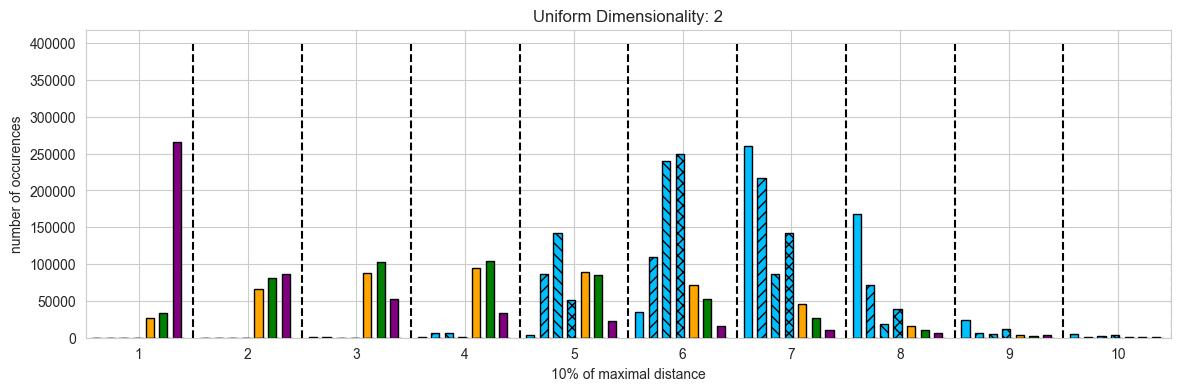

Dimensionality: 3 Seed: 0 Position: 5
min value: 0.30889337295845776
max value: 15.688795462213449
min value: 3.1762935470582856
max value: 16.17030007220876
min value: 6.580320639099361
max value: 19.981014891536535
min value: 9.735696024715317
max value: 30.807031826995082
min value: 0.30889337295845776
max value: 160.31763745717643
min value: 0.4037400057730167
max value: 277.3789985402408
min value: 5.864668584099064e-08
max value: 0.9851441279175637
Dimensionality: 3 Seed: 1 Position: 6
min value: 0.5299237074802643
max value: 16.2305250890392
min value: 2.5879534139650944
max value: 16.50602672369013
min value: 6.572564589569867
max value: 19.979812595668207
min value: 10.068372281272763
max value: 23.963496948206803
min value: 0.5299237074802643
max value: 161.395707877083
min value: 0.8847929226768603
max value: 279.28867427793233
min value: 1.4920344781899075e-07
max value: 0.9871129847699907
Dimensionality: 3 Seed: 2 Position: 7
min value: 0.8967666254792365
max value: 16.253

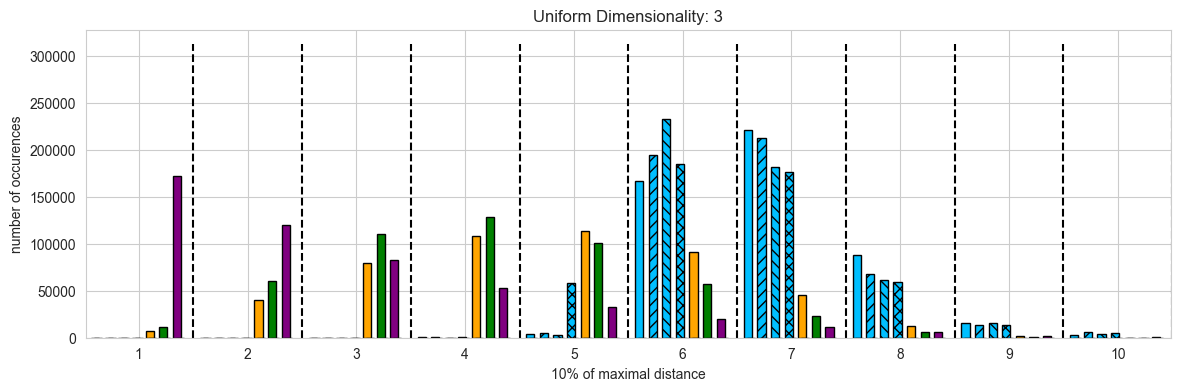

Dimensionality: 5 Seed: 0 Position: 10
min value: 4.054819340399245
max value: 37.66200988780691
min value: 11.721437390587298
max value: 45.80785378184867
min value: 18.6708613663905
max value: 52.60370388673671
min value: 24.05309708758459
max value: 54.92160144040576
min value: 4.054819340399245
max value: 186.98028365394046
min value: 7.136813538775371
max value: 416.86638436756664
min value: 0.0002643694844585154
max value: 0.928799811226704
Dimensionality: 5 Seed: 1 Position: 11
min value: 5.26191852389117
max value: 34.266535212424934
min value: 12.648174113044542
max value: 36.782517513243334
min value: 19.398148770424836
max value: 44.69902302782154
min value: 24.599118981019924
max value: 50.36356439960184
min value: 5.26191852389117
max value: 196.81836658785178
min value: 10.036592158863076
max value: 437.40038772154656
min value: 0.00018275790000576997
max value: 0.938001253337708
Dimensionality: 5 Seed: 2 Position: 12
min value: 5.198654029272521
max value: 36.10288658701

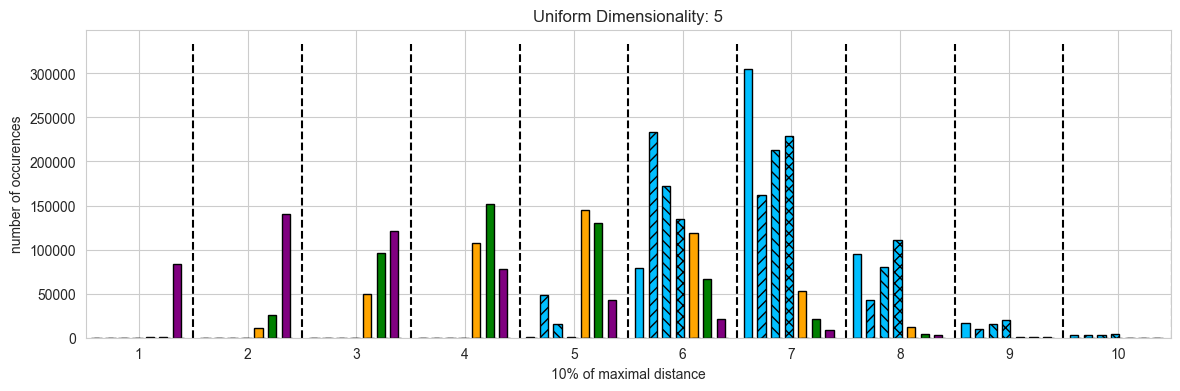

Dimensionality: 7 Seed: 0 Position: 15
min value: 10.877341510598974
max value: 57.62255446156789
min value: 21.477748170131708
max value: 58.324264696604345
min value: 32.10281599528633
max value: 63.108809227974554
min value: 38.12527764074607
max value: 67.73625200899296
min value: 10.877341510598974
max value: 214.96587859057027
min value: 20.180720053778014
max value: 564.7467071168173
min value: 0.0022745960360148754
max value: 0.8474110609313492
Dimensionality: 7 Seed: 1 Position: 16
min value: 13.190540399354315
max value: 54.30030517996651
min value: 19.740106892342414
max value: 59.20977756260749
min value: 31.910664114933137
max value: 63.442509329272355
min value: 37.20857722144725
max value: 72.77092241401058
min value: 13.190540399354314
max value: 207.00727577083427
min value: 28.755643952028773
max value: 533.1103761118416
min value: 0.0015860836683849744
max value: 0.9098342466746854
Dimensionality: 7 Seed: 2 Position: 17
min value: 12.117464124658875
max value: 54.167

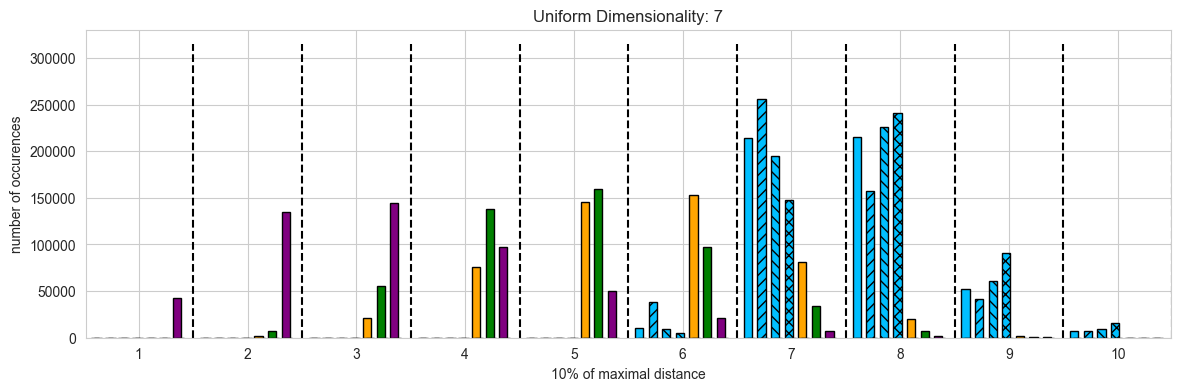

Dimensionality: 10 Seed: 0 Position: 20
min value: 23.86347709704326
max value: 80.09388485098505
min value: 41.3435723225469
max value: 80.70099723543987
min value: 50.14559601405186
max value: 85.84290575210397
min value: 55.42361859870569
max value: 91.61618288285206
min value: 23.86347709704326
max value: 230.807724575293
min value: 62.60241877773515
max value: 706.5727893622318
min value: 0.006796639140214222
max value: 0.8097517330310657
Dimensionality: 10 Seed: 1 Position: 21
min value: 27.745826682809145
max value: 77.70569040789054
min value: 34.879822235608486
max value: 80.78051917728705
min value: 49.93001228382873
max value: 86.85694564923816
min value: 56.365482510148546
max value: 92.43561715702013
min value: 27.745826682809145
max value: 230.49646560278546
min value: 64.34531377448474
max value: 689.1762622646879
min value: 0.01036093131107041
max value: 0.8141703701536493
Dimensionality: 10 Seed: 2 Position: 22
min value: 22.217858679791387
max value: 74.10634460885346

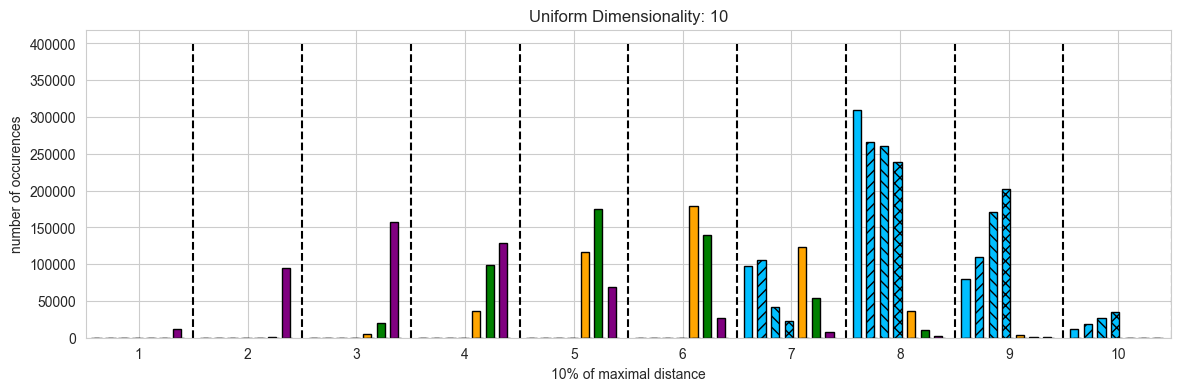

Dimensionality: 15 Seed: 0 Position: 25
min value: 48.64147399077166
max value: 105.5492086436851
min value: 65.92325229413154
max value: 113.7344536579208
min value: 77.19312505541076
max value: 118.65759374711419
min value: 82.41189965239259
max value: 125.02934214998142
min value: 48.64147399077166
max value: 266.1179038466288
min value: 148.75439959224755
max value: 957.5869578878974
min value: 0.015509204817681366
max value: 0.8038293322234817
Dimensionality: 15 Seed: 1 Position: 26
min value: 44.54373419270978
max value: 109.91416480727007
min value: 63.78734492752186
max value: 114.81278172015152
min value: 79.20830268463791
max value: 120.88370872932369
min value: 84.25141636786068
max value: 122.96939266151385
min value: 44.54373419270978
max value: 263.8352045832085
min value: 149.8915299555359
max value: 963.8410687665922
min value: 0.021606872621265594
max value: 0.743809164848285
Dimensionality: 15 Seed: 2 Position: 27
min value: 44.250284929635185
max value: 105.467877143

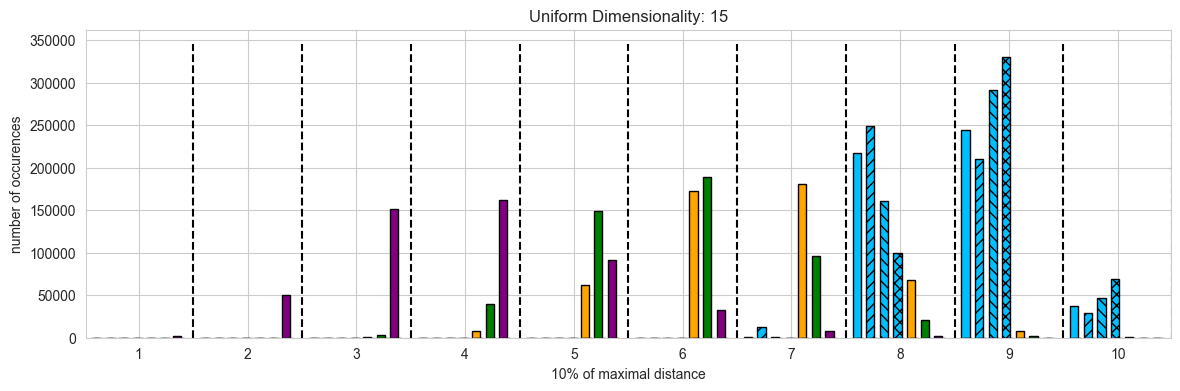

Dimensionality: 20 Seed: 0 Position: 30
min value: 67.28938288569017
max value: 134.49050791940618
min value: 83.34751015750192
max value: 137.57228918432324
min value: 99.34284727491399
max value: 146.6522491113758
min value: 107.4537927920085
max value: 154.81098393081194
min value: 67.28938288569017
max value: 298.3071389458447
min value: 237.7471877389661
max value: 1222.9436433308483
min value: 0.02469306378042513
max value: 0.6778005701894165
Dimensionality: 20 Seed: 1 Position: 31
min value: 74.11151308207741
max value: 133.6262675077332
min value: 93.31753911945601
max value: 135.44600890283226
min value: 105.09052463967389
max value: 145.81573070051226
min value: 110.150922234021
max value: 149.60697848129578
min value: 74.11151308207741
max value: 284.1805124974808
min value: 255.0537341774915
max value: 1172.2727664267663
min value: 0.03418908914794072
max value: 0.6442476946894431
Dimensionality: 20 Seed: 2 Position: 32
min value: 64.73326380367234
max value: 132.7030694658

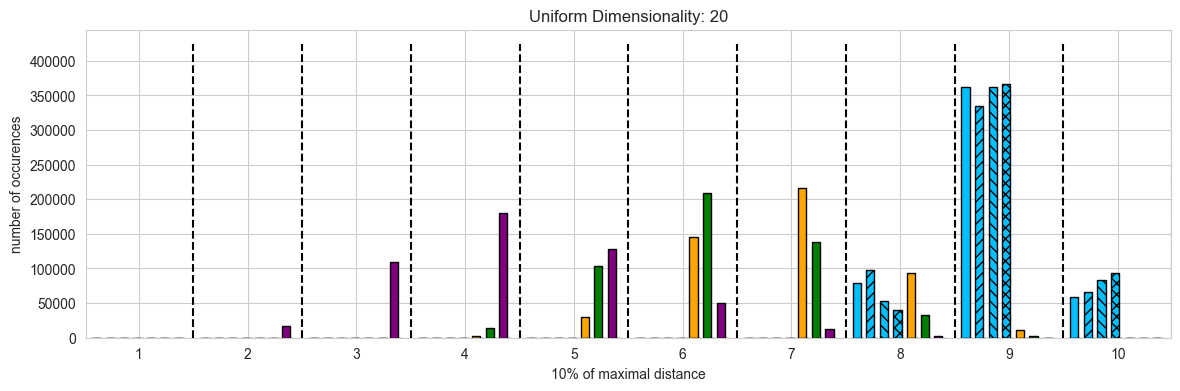

Dimensionality: 25 Seed: 0 Position: 35
min value: 97.35452761330991
max value: 155.53635495294094
min value: 113.3924671428394
max value: 160.34882401604636
min value: 120.83894415839602
max value: 167.4667145185935
min value: 130.57636939003459
max value: 173.58365009112367
min value: 97.35452761330991
max value: 304.017231773003
min value: 371.1109442676414
max value: 1388.2761608957144
min value: 0.04380247565572337
max value: 0.6216630612982674
Dimensionality: 25 Seed: 1 Position: 36
min value: 91.31193744397726
max value: 152.96892871813193
min value: 111.16755443672547
max value: 162.5798514108822
min value: 122.69293386532696
max value: 169.2471806062347
min value: 127.82836442065405
max value: 174.43177387145926
min value: 91.31193744397726
max value: 307.7720777724287
min value: 361.7529113940317
max value: 1405.8684948464097
min value: 0.040019977354157854
max value: 0.6132061084909559
Dimensionality: 25 Seed: 2 Position: 37
min value: 83.98612071502743
max value: 161.786324

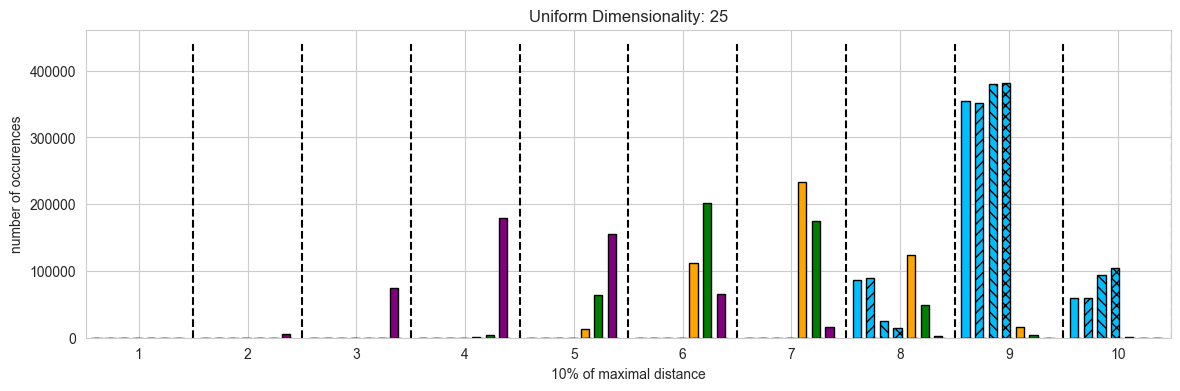

Dimensionality: 50 Seed: 0 Position: 40
min value: 153.62364416970277
max value: 245.91942753418493
min value: 195.07662986582943
max value: 246.1688262940999
min value: 206.83148141845703
max value: 258.91848018551997
min value: 213.15554314779396
max value: 261.86443034508386
min value: 153.62364416970277
max value: 398.14734141302847
min value: 861.6968281222281
max value: 2487.5614740846304
min value: 0.07137420170146702
max value: 0.48840576979947736
Dimensionality: 50 Seed: 1 Position: 41
min value: 177.3163956900725
max value: 242.31812721629694
min value: 196.94576491504978
max value: 252.1843799272576
min value: 207.13518669448405
max value: 258.0107928966706
min value: 210.6380872648768
max value: 260.7329995144737
min value: 177.3163956900725
max value: 393.2798852709799
min value: 927.488380905671
max value: 2472.7461282770237
min value: 0.08383290897210882
max value: 0.5176129404595513
Dimensionality: 50 Seed: 2 Position: 42
min value: 162.73152882801926
max value: 242.869

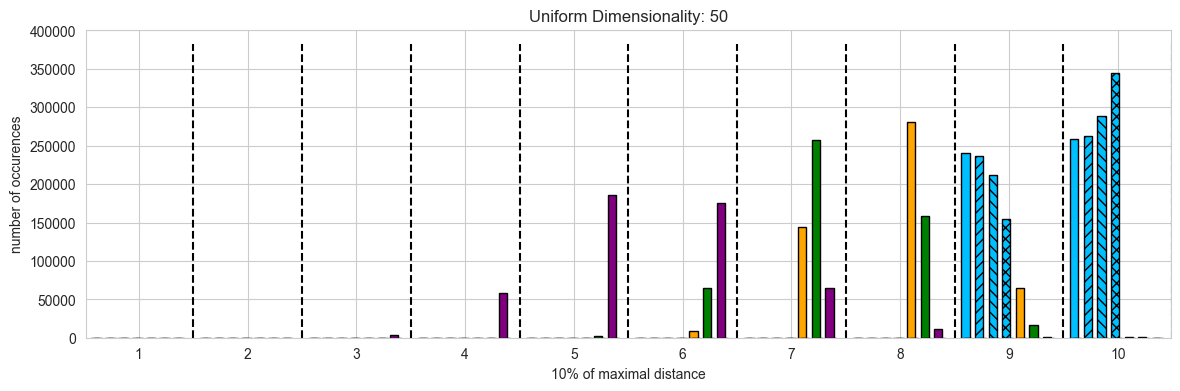

Dimensionality: 75 Seed: 0 Position: 45
min value: 231.95791378165595
max value: 311.3961435633564
min value: 261.7749983391549
max value: 314.72201750229095
min value: 272.3186028131028
max value: 325.301393222576
min value: 278.42697550265825
max value: 333.70050333391737
min value: 231.95791378165598
max value: 464.53811925872014
min value: 1540.6331617537733
max value: 3480.4983994084046
min value: 0.11302904565282546
max value: 0.47161545334172894
Dimensionality: 75 Seed: 1 Position: 46
min value: 239.3521893801035
max value: 308.07219725122656
min value: 259.8010585001796
max value: 312.98256034120976
min value: 269.97554752880245
max value: 320.62861417162213
min value: 276.1685515511917
max value: 323.56202540235137
min value: 239.3521893801035
max value: 474.97216587745913
min value: 1659.9715876069617
max value: 3661.0840341384733
min value: 0.10918863217353392
max value: 0.4554742430294072
Dimensionality: 75 Seed: 2 Position: 47
min value: 222.98114470272915
max value: 308.7

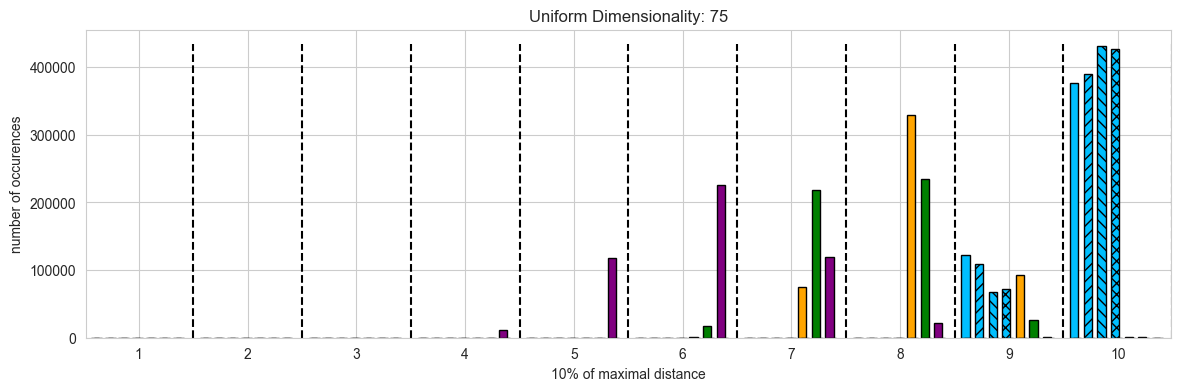

Dimensionality: 100 Seed: 0 Position: 50
min value: 295.91916219058186
max value: 369.05602213900346
min value: 316.7861428557086
max value: 372.7525508901059
min value: 323.714876987072
max value: 379.61877307804104
min value: 326.9890117829957
max value: 384.72830114128453
min value: 295.91916219058186
max value: 539.56889229379
min value: 2348.8336945124456
max value: 4680.144854613532
min value: 0.12842705506696528
max value: 0.45764536546672074
Dimensionality: 100 Seed: 1 Position: 51
min value: 297.5716721505349
max value: 359.6537607174906
min value: 313.0573346991021
max value: 368.7364195667903
min value: 325.8020139581906
max value: 374.24550895931736
min value: 330.9931625889371
max value: 379.42032355981706
min value: 297.5716721505349
max value: 522.2299164278388
min value: 2311.105652542124
max value: 4567.046810663085
min value: 0.12414287405695035
max value: 0.41868761991742154
Dimensionality: 100 Seed: 2 Position: 52
min value: 296.8892344366083
max value: 366.90761271

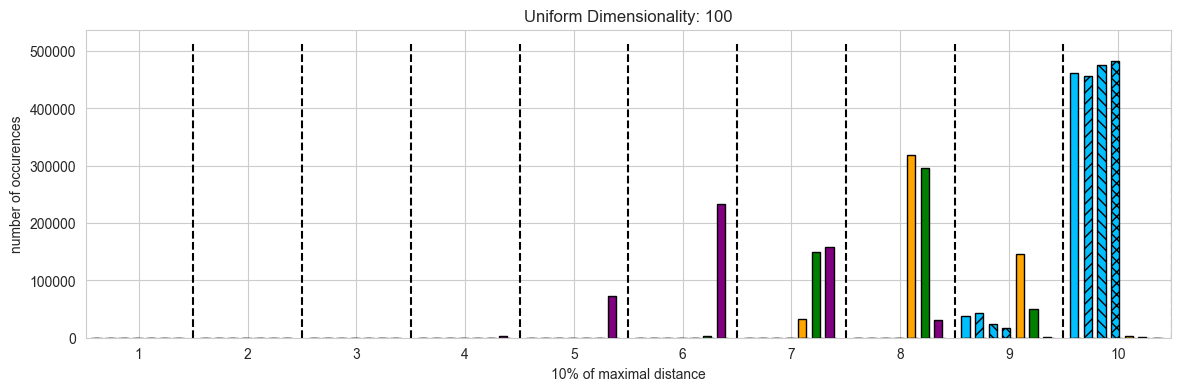

Dimensionality: 150 Seed: 0 Position: 55
min value: 383.75378150377423
max value: 462.4792643006166
min value: 407.50499402684557
max value: 463.30067373007074
min value: 416.81833182389795
max value: 470.2147783364635
min value: 422.2327336594749
max value: 477.8638104931761
min value: 383.75378150377423
max value: 613.9531314618392
min value: 3774.2830159746813
max value: 6419.446413292489
min value: 0.14121810186625017
max value: 0.38026575499749704
Dimensionality: 150 Seed: 1 Position: 56
min value: 393.94282806051154
max value: 459.0420613311384
min value: 400.5461312137343
max value: 463.52246217482946
min value: 417.4645105057526
max value: 468.57440888518306
min value: 422.82371565928054
max value: 473.1893098147761
min value: 393.94282806051154
max value: 631.4384886126363
min value: 3625.6494081707892
max value: 6469.375198806943
min value: 0.1493546244626639
max value: 0.40184742334078893
Dimensionality: 150 Seed: 2 Position: 57
min value: 373.62847726781473
max value: 462.7

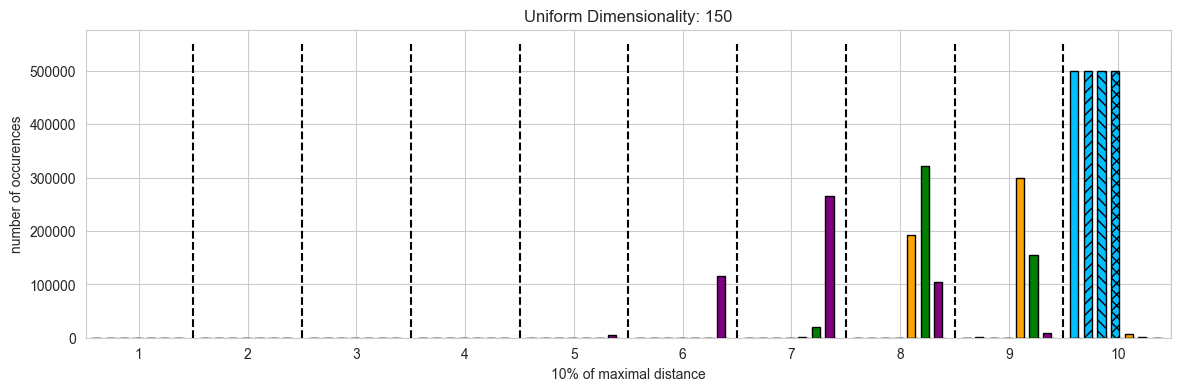

Dimensionality: 200 Seed: 0 Position: 60
min value: 459.68912802615233
max value: 541.2829022715481
min value: 483.6514371872117
max value: 546.0342846082204
min value: 494.7538245109646
max value: 548.3373645975724
min value: 501.68550993876835
max value: 554.8153219672686
min value: 459.68912802615233
max value: 685.6073378004753
min value: 5232.419177123873
max value: 8246.208921008907
min value: 0.1550582898305023
max value: 0.3685421009153712
Dimensionality: 200 Seed: 1 Position: 61
min value: 462.5791149687967
max value: 536.4473489546288
min value: 477.3976974293277
max value: 542.4992048195016
min value: 495.1743785523302
max value: 546.0889037939692
min value: 499.43118166550926
max value: 551.1023108669281
min value: 462.5791149687967
max value: 691.406616558668
min value: 5107.621906024228
max value: 8286.508534722376
min value: 0.14673651564233758
max value: 0.37696526453238444
Dimensionality: 200 Seed: 2 Position: 62
min value: 465.1714497901775
max value: 537.111444152737

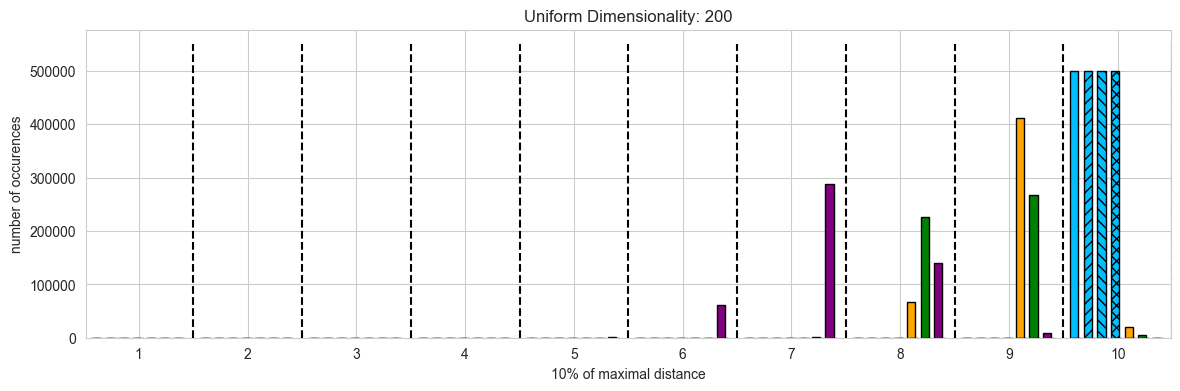

Dimensionality: 250 Seed: 0 Position: 65
min value: 524.0797377806463
max value: 606.3858156420799
min value: 551.6096914867964
max value: 610.9988618960871
min value: 560.613242997699
max value: 615.1644968634617
min value: 570.7219122624376
max value: 620.6186482917725
min value: 524.0797377806462
max value: 749.0915903266985
min value: 6581.598703418418
max value: 10042.341736929828
min value: 0.1704756038093933
max value: 0.357445788284963
Dimensionality: 250 Seed: 1 Position: 66
min value: 526.078530541981
max value: 611.1202318400198
min value: 547.5016422638114
max value: 618.4732632845801
min value: 561.9452575402378
max value: 623.2795728862397
min value: 567.8226696802926
max value: 626.8844056389992
min value: 526.078530541981
max value: 755.5057329633136
min value: 6478.254200543607
max value: 10173.184555332911
min value: 0.15360607112101088
max value: 0.35517854108836433
Dimensionality: 250 Seed: 2 Position: 67
min value: 523.4454398674117
max value: 611.389492681936
min 

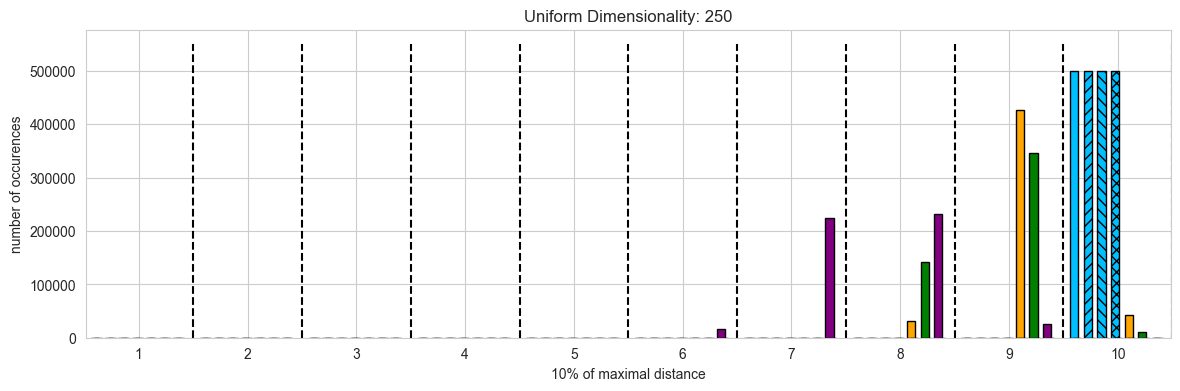

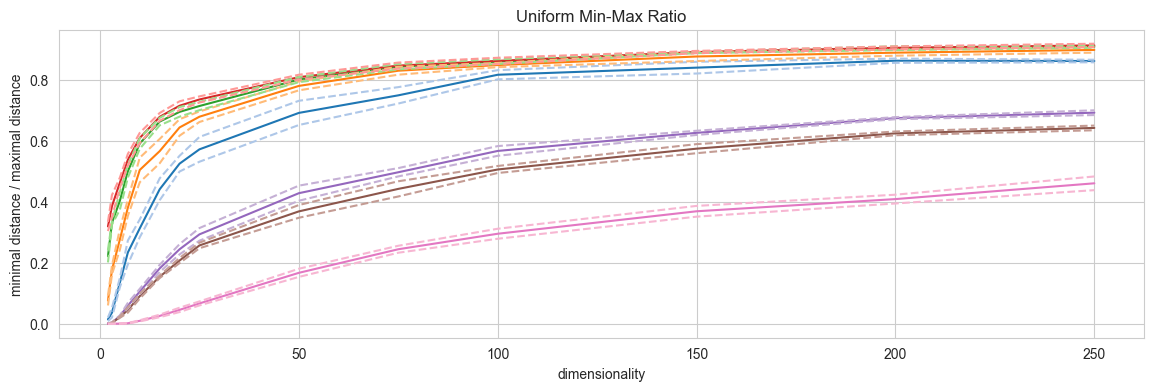

In [75]:
print(datasets)
num_bin = 10
make_graph(points_list, labels_list, num_bin, eucliddists, manhatdists, cosinedists, dsnedists, dsnedists2, dsnedists5, dsnedists10, dims, seeds, datasets)#, dsnedist2)